# Peer-graded Assignment: Подготовка данных для построения модели

На прошлой неделе мы познакомились с задачей и данными. Пора задуматься о том, с какими особенностями и трудностями нам предстоит работать в процессе построения модели прогнозирования оттока. Как может сказаться на качестве модели то, что данные не сбалансированы по классам? Какие метрики качества подходят в таких случаях? Каким будет KPI? Как организовать процесс оценки решения с помощью кросс-валидации, какую схему выбрать? Как следует обрабатывать данные разного типа (например, категориальные) для того, чтобы использовать их при построении модели? На все эти вопросы нам предстоит ответить на этой неделе.

## Инструкции

__Вопрос 1.__   
Начнем с простого, но важного шага. Отделите небольшую выборку от существующих данных. Назовем её hold-out dataset. Эта выборка нужна для контроля качества решения: она не должна использоваться вплоть до контроля качества решения. Наличие такой выборки поможет убедиться, что в процессе моделирования не было допущено ошибок, не произошло переобучение. В качестве ответа загрузите полученный файл (или файлы, если вы работаете а данными и метками как с 2мя файлами)


In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import model_selection as ms
import csv

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
data_all = pd.read_csv('orange_small_churn_data.txt', sep=',')
labels_all = pd.read_csv('orange_small_churn_labels.txt', sep=',', header=None, names=['Class'])

In [20]:
data_train = pd.concat((data_all, labels_all), axis=1)

Понятно, что нам надо "откусить" какую-то часть от данных. Возникает два основных вопроса - во-первых, сколько "откусывать", во-вторых, откуда именно. 

По поводу сколько - возьмем 33% - данных у нас достаточно много, можно не мелочиться. 

Для того, чтобы понять, откуда, надо посмотреть на данные. Если они хорошо перемешаны, то можно взять из хвоста, например. Если плохо - лучше испрользовать средства перемешивания данных.

<Container object of 134 artists>

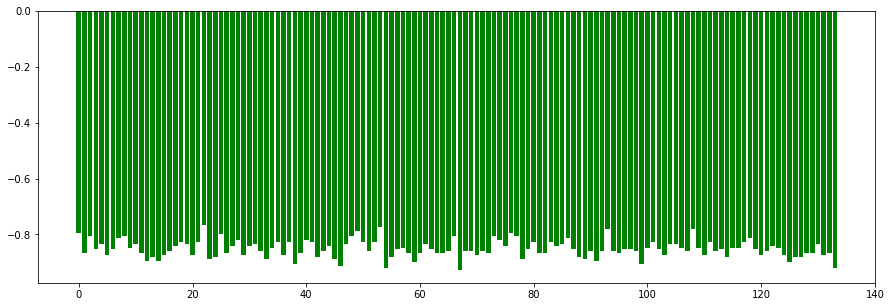

In [21]:
#хорошо бы посмотреть, насколько равномерно перемешаны данные, нет ли где-нибудь преобладания -1 или 1
#данных много, поэтому разобьем их на на карманты по 300 объектов и посмотрим на график средних по ним
#(200 взято эмпирическии, если карманы уже, то график слишком рябит, если шире, то сильне теряем информацию)
labels_bins = labels_all.copy()
labels_bins['bin'] = [int(np.floor(x/300.0)) for x in labels_bins.index.values]
labels_bin_groups = labels_bins.groupby(by=['bin'], as_index=False).mean()

plt.figure(1, (15,5))
plt.bar(range(0,labels_bin_groups.shape[0]), labels_bin_groups['Class'].values, color='Green')    

Вывод, которые можно сделать по графику - данные хорошо перемешаны, не видно каких-то особых областей. Берем 33% из хвоста.

In [12]:
data_all.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [26]:
X_train, X_test, y_train, y_test = ms.train_test_split(data_all, labels_all, test_size = 0.33
                                                       ,random_state = 0, shuffle=True, stratify=labels_all)
print X_train

       Var1  Var2  Var3  Var4  Var5     Var6  Var7  Var8  Var9      Var10  \
17934   NaN   0.0   0.0   NaN   NaN      NaN   NaN   NaN   NaN        NaN   
15809   NaN   NaN   NaN   0.0   NaN      NaN   NaN   NaN   NaN        NaN   
29947   NaN   NaN   NaN   NaN   NaN   2401.0   0.0   NaN   NaN        NaN   
34468   NaN   NaN   NaN   NaN   NaN    889.0   7.0   NaN   NaN        NaN   
2172    NaN   NaN   NaN   NaN   NaN   1267.0  14.0   NaN   NaN        NaN   
28280   NaN   NaN   NaN   NaN   NaN    665.0  14.0   NaN   NaN        NaN   
33      NaN   NaN   NaN   NaN   NaN    896.0   7.0   NaN   NaN        NaN   
28535   NaN   NaN   NaN   NaN   NaN    770.0   0.0   NaN   NaN        NaN   
35908   NaN   NaN   NaN   NaN   NaN   1001.0   7.0   NaN   NaN        NaN   
1949    NaN   NaN   NaN   NaN   NaN   1218.0   7.0   NaN   NaN        NaN   
12266   NaN   NaN   NaN   NaN   NaN    371.0   0.0   NaN   NaN        NaN   
19775   NaN   0.0   0.0   NaN   NaN      NaN   NaN   NaN   NaN        NaN   

In [27]:
train_data = pd.concat((X_train, y_train), axis=1)
test_data = pd.concat((X_test, y_test), axis=1)

In [28]:
train_data.to_csv('orange_small_churn_traintest.csv', index=False)
test_data.to_csv('orange_small_churn_holdout.csv', index=False)

__Вопрос 2.__   
Подумайте и предложите несколько способов (не менее 3х) обработки категориальных признаков, для того, чтобы их можно было использовать при построении модели. Обратите внимание на модуль sklearn.preprocessing. Начать поиски можно с sklearn.preprocessing.OneHotEncoder.

Математические модели, которые мы, как правило, используем в классификации, предолагают, что мы имеем дело с числовыми признаками. Поэтому встает вопрос, как преобразовать категориальные признаки в числовые. Рассмотрим несколько способов.

2.1. Первый способ, превратить категориальные значения в числовые - это преобразовать один признак в N новых, где N - количество уникальных значений рассматриваемого категориального признака. Сделать это можно с помощью функции sklearn.preprocessing.OneHotEncoder. 

Основной проблемой этого подхода является то, что в случае значительного количества уникальных значений признака, количество столбцов становится громадным, что затрудняет работу с такой моделью. Еще одним минусом является то, что новые значения мы никак не учтем, но в нашем случае это можно не рассматривать, поскольку задачи учитывать значения из будущего перед нами не ставится.

2.2. Второй способ, это "пересчитать" значения и заменить их на получившиеся порядковые номера. Сделать это можно при помощи sklearn.preprocessing.LabelEncoder. Тут так же есть проблема с новыми значениями, но есть и другая достаточно серьезная проблема - нумеруя значения, мы определяем порядок в них, а также вводим некоторое "расстояние" между ними. Линейные модели могут учесть такие расстояния, а реально смысла в них никакого нет, что негативно скажется на качестве модели. 

2.3. Третий способ, - использовать хэш-функции (hashing trick). То есть когда для каждого значения признака мы рассчитываем хэш-функцию. Из плюслов - неизвестные новые значения не приведут к краху модели. Правда, числовые расстояния между значениями по-прежнему смысла иметь не будут.

2.4. Четвертый способ - sklearn.feature_extraction.DictVectorizer. Класс позволяет представить уникальные сочетания разных признаков набором столбцов {0,1}. В этом случае количество необходимых столбцов намного меньше, чем в OneHotEncoder, и не возникает ненужных "расстояний" с сомнительным смыслом (а точнее, без оного). Однако для текстовых столбцов результат его применения равен OneHotEncoder, только можно обойтись без предварительного применения LabelEncoder.

__Вопрос 3.__   
Подумайте, с помощью какой метрики качества лучше всего оценивать качество будущей модели, какой будет ключевая метрика качества? Поясните свой выбор.

В случае использования моделей с вероятностью принадлежности к классу, придется выбирать порог t, который будет определять принятие оттока для значений выше t. Для того, чтобы оптимизировать модели по этому параметру следует строить кривые ROC и PR и анализировать показатели ROC-AUC и PR-AUC. Можно также посмотреть на логистическую функцию потерь, но она сильно штрафует за уверенный неверный ответ, а в нашем случае ничего страшного в том, чтобы добавить "лишнего" клиента в группу, нет. По крайней мере, я так это понимаю (лучше проработать клиента по ошибке, чем упустить потенциально уходящего клиента).

__Вопрос 4.__   Какие вспомогательные метрики качества имеет смысл считать, чтобы более полно оценить качество модели, понять, где её слабые стороны и что нужно улучшать?


Мы имеем дело с задачей классификации, поэтому естественно оценивать качество модели тем, правильно ли мы "угадали" класс. В принципе, есть только 4 возможных варианта (True Positive, False Positive,True Negative,False Negative). Базовой метрикой качества в этом случае является accuracy, то есть доля верных ответов, но она сильно зависит от сбалансированности классов и в нашем случае неприменима.

Далее следует рассмотреть точность precision (точность) - доля правильно предсказанных оттоков из общего количества предсказанных оттоков. Еще одной метрикой является полнота (recall), т.е. сколько мы угадали оттоков из общего числа оттоков. Есть ситуации, в которых precision и recall по отдельности дают не лучшие результаты, поэтому можно использовать F-меру - комбинацию precision и recall. В принципе, это то, что нам надо (ключевая метрика качества).

__Вопрос 5.__ Подберите оптимальную стратегию проведения кросс-валидации: решите, на сколько фолдов вы будете делить выборку? Выберите тип разбиения данных (k-fold, stratified k-fold, shuffle split, leave one out). Поясните ваш выбор.

Очень часто в реализации по умолчанию идет разбиение на 3 фолда. Данных достаточно много, поэтому смысла делить на большее количество я не вижу. Далее о типах. Лучше всего подходит Stratified K-Fold, т.к. этот метод обеспечивает сохранение пропорции классов в фолдах, что как раз подходит для задач классификации. Leave one out предназначен для небольших наборов (требует большого числа проверок). ShuffleSplit предпочтительнее k-fold на больших выборках, т.к. позволяет проверять модель не сразу на всем объеме данных. Но в нашем случае мы уже выбрали наиболее предпочтительный вариант.